In [1]:
from glob import glob
import pandas as pdlib
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import glob
from time import time, ctime
from datetime import datetime
import seaborn as sns

In [2]:
#Global Constants

dbloc ='/Users/senthil/Documents/alpha-research/sources/ark/ark.db'

dateTimeObj = datetime.now()
dateObj = dateTimeObj.date()
curr_date_str = str (dateObj.year)+"_" + str(dateObj.month) +"_" + str(dateObj.day)
print(curr_date_str)

#Finviz Ticker Master File 
finviz_ticker_master_file='/Users/senthil/Documents/alpha-research/sources/finviz/finviz_ticker_master_20210403MC.csv'

#ARK Fund File locations
arkk = 'https://ark-funds.com/wp-content/fundsiteliterature/csv/ARK_INNOVATION_ETF_ARKK_HOLDINGS.csv'
arkq = 'https://ark-funds.com/wp-content/fundsiteliterature/csv/ARK_AUTONOMOUS_TECHNOLOGY_&_ROBOTICS_ETF_ARKQ_HOLDINGS.csv'
arkw = 'https://ark-funds.com/wp-content/fundsiteliterature/csv/ARK_NEXT_GENERATION_INTERNET_ETF_ARKW_HOLDINGS.csv'
arkg = 'https://ark-funds.com/wp-content/fundsiteliterature/csv/ARK_GENOMIC_REVOLUTION_MULTISECTOR_ETF_ARKG_HOLDINGS.csv'
arkf = 'https://ark-funds.com/wp-content/fundsiteliterature/csv/ARK_FINTECH_INNOVATION_ETF_ARKF_HOLDINGS.csv'
arkx = 'https://ark-funds.com/wp-content/fundsiteliterature/csv/ARK_SPACE_EXPLORATION_&_INNOVATION_ETF_ARKX_HOLDINGS.csv'
prnt = 'https://ark-funds.com/wp-content/fundsiteliterature/csv/THE_3D_PRINTING_ETF_PRNT_HOLDINGS.csv'
izrl = 'https://ark-funds.com/wp-content/fundsiteliterature/csv/ARK_ISRAEL_INNOVATIVE_TECHNOLOGY_ETF_IZRL_HOLDINGS.csv'

#ARK CSV Folder
ark_csv_base_folder='/Users/senthil/Documents/alpha-research/sources/ark/'
finviz_csv_base_folder='/Users/senthil/Documents/alpha-research/sources/finviz/'
finviz_all_ticker_file='finviz_ticker_master_20210403MC.csv'

2021_4_16


In [3]:
# Common Functions
def get_pricing_history(ticker_array) :
    try :
        df_ark_funds_pricing=pdlib.DataFrame()
        for symbol in ticker_array : 
            stock = yf.Ticker(symbol)
            curr_df = stock.history(period="max")
            curr_df['ticker'] = symbol
            df_ark_funds_pricing = df_ark_funds_pricing.append(curr_df)    
        return df_ark_funds_pricing
    except :
        print('Error  ' + symbol)

def get_pricing_chart(ticker_array) :
    try:
        df_fund_pricing=get_pricing_history(ticker_array)
        for ticker in ticker_array :
            df_fund_pricing.loc[df_fund_pricing['ticker'] == ticker]['Close'].plot(label=ticker,figsize=(16,8),title='Closing Price')
        plt.legend()
    except :
        print('Error  ' + symbol)
        
def load_all_ark_csvs(path) :
    dfs = []
    for filename in glob.glob(path):
        print('loading..'+ filename)
        dfs.append(pd.read_csv(filename))
    big_frame = pdlib.concat(dfs, ignore_index=True)
    return big_frame.dropna()
    
path = '/Users/senthil/Documents/alpha-research/sources/ark/ark-csvs/*'
ark_data=(load_all_ark_csvs(path))
print(ark_data)
        
#ticker_array = {"MSFT","IBM","TSLA"}        
#get_pricing_chart(ticker_array)

loading../Users/senthil/Documents/alpha-research/sources/ark/ark-csvs/THE_3D_PRINTING_ETF_PRNT_HOLDINGS.csv
loading../Users/senthil/Documents/alpha-research/sources/ark/ark-csvs/ARK_ISRAEL_INNOVATIVE_TECHNOLOGY_ETF_IZRL_HOLDINGS.csv
loading../Users/senthil/Documents/alpha-research/sources/ark/ark-csvs/ARK_INNOVATION_ETF_ARKK_HOLDINGS.csv
loading../Users/senthil/Documents/alpha-research/sources/ark/ark-csvs/ARK_NEXT_GENERATION_INTERNET_ETF_ARKW_HOLDINGS.csv
loading../Users/senthil/Documents/alpha-research/sources/ark/ark-csvs/ARK_GENOMIC_REVOLUTION_MULTISECTOR_ETF_ARKG_HOLDINGS.csv
loading../Users/senthil/Documents/alpha-research/sources/ark/ark-csvs/ARK_AUTONOMOUS_TECHNOLOGY_&_ROBOTICS_ETF_ARKQ_HOLDINGS.csv
loading../Users/senthil/Documents/alpha-research/sources/ark/ark-csvs/ARK_FINTECH_INNOVATION_ETF_ARKF_HOLDINGS.csv
loading../Users/senthil/Documents/alpha-research/sources/ark/ark-csvs/ARK_SPACE_EXPLORATION_&_INNOVATION_ETF_ARKX_HOLDINGS.csv
         date  fund                      

In [4]:
#Question 1 - How ARK fund is distributed by market value
pdlib.options.display.float_format = '{:,.2f}'.format
ark_data.groupby(['fund']).sum()

,shares,market value($),weight(%)
fund,,,
ARKF,"89,950,955.00","4,114,602,693.95",99.71
ARKG,"204,197,547.00","9,653,059,336.51",99.69
ARKK,"265,561,754.00","23,345,648,506.03",99.31
ARKQ,"56,366,423.00","3,383,263,843.59",99.84
ARKW,"85,344,767.00","6,987,415,667.90",100.02
ARKX,"6,591,260.00","452,617,196.87",98.51
IZRL,"43,696,114.00","347,738,426.33",99.57
PRNT,"11,838,398.00","592,099,284.23",99.13


In [5]:
#Question 2 - How many distinct stocks are there are across the ARK portfolio
ark_ticker_list=ark_data.ticker.unique()
print('Total Distinct Instruments [Stocks, ETFs..] '+ str(len(ark_ticker_list)))

Total Distinct Instruments [Stocks, ETFs..] 273


In [6]:
#Question 3 - How many are listed in US market vs. International
df_all_tickers=pd.read_csv(finviz_ticker_master_file)
df_all_tickers.head()
stocks_with_info_list =[]
stocks_without_info_list =[]

for symbol in ark_ticker_list :
    symbol_count=df_all_tickers['Ticker'].str.contains(symbol).sum()
    if symbol_count>0:
        stocks_with_info_list.append(symbol)
    else :
        stocks_without_info_list.append(symbol) 
        
print('Listed in US Market  ' + str(len(stocks_with_info_list)))
print('Not Listed in US Market ' + str(len(stocks_without_info_list)))


Listed in US Market  226
Not Listed in US Market 47


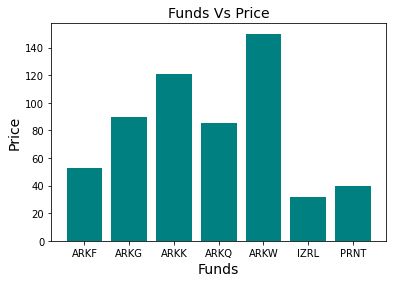

In [7]:
#Question 4 - How ARK funds compared to one another 
ark_funds_array={'ARKK','ARKQ','ARKW','ARKG','ARKF','ARKX','PRNT','IZRL'}
df_ark_funds=df_all_tickers.loc[df_all_tickers['Ticker'].isin(ark_funds_array)]

Funds = df_ark_funds['Ticker']
Price =  df_ark_funds['Price']

xAxis = [i + 0.5 for i, _ in enumerate(Funds)]
  
plt.bar(xAxis, Price, color='teal')
plt.title('Funds Vs Price', fontsize=14)
plt.xlabel('Funds', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks([i + 0.5 for i, _ in enumerate(Funds)], Funds)
plt.show()

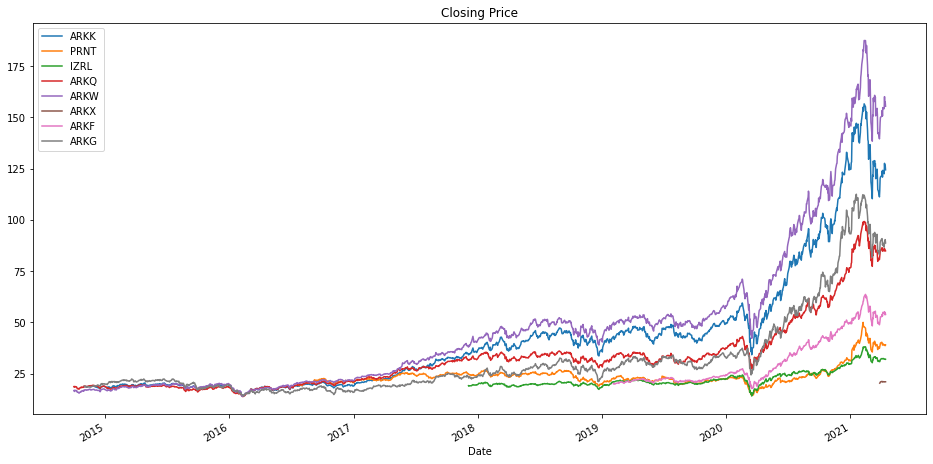

In [8]:
#Question 5 - How ARK Funds pricing performance look over the years
get_pricing_chart(ark_funds_array)


In [9]:
#Question 6 - How ARK Funds Underlying instruments are performing

def p2f(x):
    try :
        x = float(x.strip('%'))
        return(x)
    except :
        return 0
all_tickers_csv_file=finviz_csv_base_folder+finviz_all_ticker_file
df_ark_all_tickers = pdlib.read_csv(all_tickers_csv_file,converters={'20-Day Simple Moving Average':p2f,'50-Day Simple Moving Average':p2f,'Profit Margin':p2f })
df_ark_all_tickers = df_ark_all_tickers[df_ark_all_tickers['Ticker'].isin(stocks_with_info_list)]

df_temp = df_ark_all_tickers.loc[ 
    #(df_ark_all_tickers['Sector'] =='Technology') &
    (df_ark_all_tickers['EPS (ttm)'] > 0) &
    (df_ark_all_tickers['Current Ratio'] > 1.5) &  
    (df_ark_all_tickers['20-Day Simple Moving Average'] > 0 ) &
    (df_ark_all_tickers['Relative Strength Index (14)'] > 60 ) 
    ]

In [10]:
df_temp.shape

(10, 72)

In [11]:
#Question 6.1 - Top 10 Instruments by price
pd.set_option("display.max.columns", None)
print('Top 10 Instruments by Price: ')
(df_ark_all_tickers[['Ticker','Sector','Industry','Company','Market Cap','Price','P/E','PEG','P/S','Profit Margin']]).sort_values(by=['Price'], ascending=False).head(10)
#print(df_calc)
#ticker_array=df_calc['Ticker']
#get_pricing_chart(ticker_array)

Top 10 Instruments by Price: 


,Ticker,Sector,Industry,Company,Market Cap,Price,P/E,PEG,P/S,Profit Margin
354,AMZN,Consumer Cyclical,Internet Retail,"Amazon.com, Inc.","1,588,750.21","3,161.00",75.71,2.04,4.12,5.50
3107,GOOG,Communication Services,Internet Content & Information,Alphabet Inc.,"1,467,490.55","2,137.75",36.47,2.15,8.04,0.00
4567,MELI,Consumer Cyclical,Internet Retail,"MercadoLibre, Inc.","73,772.82","1,510.50",nan,nan,18.57,0.00
6434,SHOP,Technology,Software - Application,Shopify Inc.,"142,473.61","1,155.41",452.04,12.05,48.63,10.90
3837,ISRG,Healthcare,Medical Instruments & Supplies,"Intuitive Surgical, Inc.","85,323.59",747.60,84.94,9.30,19.58,24.30
7166,TSLA,Consumer Cyclical,Auto Manufacturers,"Tesla, Inc.","635,183.40",661.75,"1,063.91",33.14,20.14,2.20
7176,TTD,Technology,Software - Application,"The Trade Desk, Inc.","30,385.70",658.84,134.32,4.97,36.35,29.00
5146,NVDA,Technology,Semiconductors,NVIDIA Corporation,"334,421.12",552.47,80.22,3.18,20.06,26.00
262,ALGN,Healthcare,Medical Devices,"Align Technology, Inc.","42,274.08",545.05,24.28,0.85,17.10,71.80
4961,NFLX,Communication Services,Entertainment,"Netflix, Inc.","236,465.54",539.42,91.60,2.06,9.46,11.00


In [12]:
#Question 6.2 - Bottom 10 Instruments by price
print('Bottom 10 Instruments : ')
#df_calc = (df_ark_all_tickers[['Ticker','Sector','Industry','Company','Market Cap','Price','P/E','PEG','P/S','Profit Margin']]).sort_values(by=['Price'], ascending=False).tail(10)
(df_ark_all_tickers[['Ticker','Sector','Industry','Company','Market Cap','Price','P/E','PEG','P/S','Profit Margin']]).sort_values(by=['Price'], ascending=False).tail(10)
#print(df_calc)
#ticker_array=df_calc['Ticker']
#get_pricing_chart(ticker_array)

Bottom 10 Instruments : 


,Ticker,Sector,Industry,Company,Market Cap,Price,P/E,PEG,P/S,Profit Margin
422,AQB,Consumer Defensive,Farm Products,"AquaBounty Technologies, Inc.",477.33,6.74,nan,nan,"4,773.27",0.00
4131,KMDA,Healthcare,Drug Manufacturers - Specialty & Generic,Kamada Ltd.,276.97,6.19,16.29,2.71,2.08,0.00
1234,CERS,Healthcare,Biotechnology,Cerus Corporation,974.75,6.08,nan,nan,8.54,-52.40
2353,EVGN,Healthcare,Biotechnology,Evogene Ltd.,197.09,4.88,nan,nan,244.83,0.00
5804,PTNR,Communication Services,Telecom Services,Partner Communications Company Ltd.,877.10,4.81,145.76,72.88,0.91,0.60
5780,PSTI,Healthcare,Biotechnology,Pluristem Therapeutics Inc.,166.14,4.81,nan,nan,nan,0.00
1046,BVXV,Healthcare,Biotechnology,BiondVax Pharmaceuticals Ltd.,60.88,3.91,nan,nan,nan,0.00
1574,CRNT,Technology,Communication Equipment,Ceragon Networks Ltd.,310.86,3.81,nan,nan,1.18,-6.50
2356,EVK,Consumer Cyclical,Apparel Manufacturing,"Ever-Glory International Group, Inc.",40.29,2.79,nan,nan,0.14,-1.10
5282,ONE,Consumer Defensive,Education & Training Services,OneSmart International Education Group Limited,412.80,2.39,nan,nan,0.81,-24.00


In [13]:
#Question 7.1 - What are the Top 10 most active Instruments 
print('Most Active 10 Instruments : ')
#df_calc=(df_ark_all_tickers[['Ticker','Sector','Industry','Company','Market Cap','Price','P/E','PEG','P/S','Volume']]).sort_values(by=['Volume'], ascending=False).head(10)
(df_ark_all_tickers[['Ticker','Sector','Industry','Company','Market Cap','Price','P/E','PEG','P/S','Volume']]).sort_values(by=['Volume'], ascending=False).tail(10)
#print(df_calc)
#ticker_array=df_calc['Ticker']
#get_pricing_chart(ticker_array)

Most Active 10 Instruments : 


,Ticker,Sector,Industry,Company,Market Cap,Price,P/E,PEG,P/S,Volume
2207,ENLV,Healthcare,Biotechnology,Enlivex Therapeutics Ltd.,175.22,11.29,nan,nan,nan,75426
1046,BVXV,Healthcare,Biotechnology,BiondVax Pharmaceuticals Ltd.,60.88,3.91,nan,nan,nan,66286
4599,MGIC,Technology,Software - Application,Magic Software Enterprises Ltd.,770.58,15.71,30.56,2.14,2.08,56623
2450,FARO,Technology,Scientific & Technical Instruments,"FARO Technologies, Inc.","1,525.32",88.22,nan,nan,5.02,52138
6901,TARO,Healthcare,Drug Manufacturers - Specialty & Generic,Taro Pharmaceutical Industries Ltd.,"2,847.10",74.59,nan,nan,4.95,35146
2298,ESLT,Industrials,Aerospace & Defense,Elbit Systems Ltd.,"6,220.80",144.00,26.77,2.46,1.33,31849
6458,SILC,Technology,Communication Equipment,Silicom Ltd.,311.39,45.86,57.54,3.84,2.90,31653
5847,PYPD,Healthcare,Biotechnology,PolyPid Ltd.,185.57,9.66,nan,nan,nan,25053
3855,ITMR,Healthcare,Medical Devices,Itamar Medical Ltd.,381.51,23.29,nan,nan,9.30,9432
5804,PTNR,Communication Services,Telecom Services,Partner Communications Company Ltd.,877.10,4.81,145.76,72.88,0.91,1584


Least Active 10 Instruments : 
     Ticker                  Sector                                  Industry  \
2207   ENLV              Healthcare                             Biotechnology   
1046   BVXV              Healthcare                             Biotechnology   
4599   MGIC              Technology                    Software - Application   
2450   FARO              Technology        Scientific & Technical Instruments   
6901   TARO              Healthcare  Drug Manufacturers - Specialty & Generic   
2298   ESLT             Industrials                       Aerospace & Defense   
6458   SILC              Technology                   Communication Equipment   
5847   PYPD              Healthcare                             Biotechnology   
3855   ITMR              Healthcare                           Medical Devices   
5804   PTNR  Communication Services                          Telecom Services   

                                  Company  Market Cap  Price    P/E   PEG  \


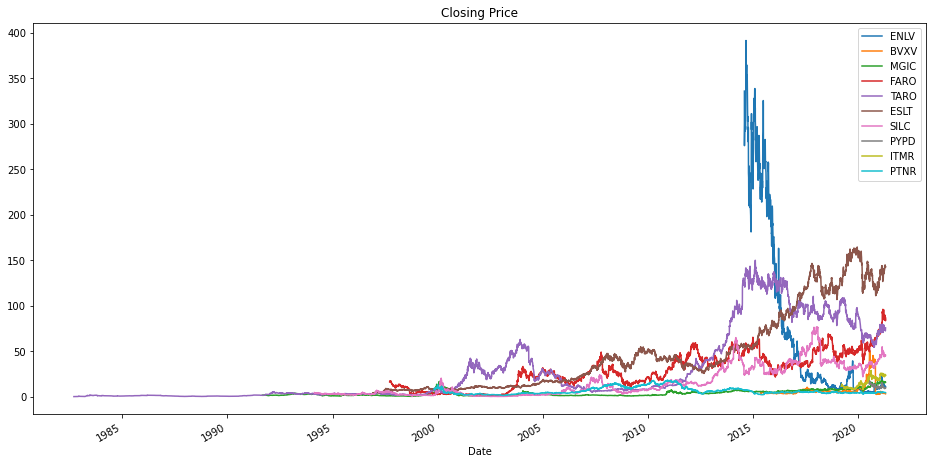

In [14]:
#Question 7.2 - What are the  10 least active Instruments 
print('Least Active 10 Instruments : ')
df_calc=(df_ark_all_tickers[['Ticker','Sector','Industry','Company','Market Cap','Price','P/E','PEG','P/S','Volume']]).sort_values(by=['Volume'], ascending=False).tail(10)
print(df_calc)
ticker_array=df_calc['Ticker']
get_pricing_chart(ticker_array)

Most Profitable 10 Instruments : 
     Ticker      Sector                          Industry  \
262    ALGN  Healthcare                   Medical Devices   
6822   SURF  Healthcare                     Biotechnology   
7601   VRTX  Healthcare                     Biotechnology   
4652   MKTX   Financial                   Capital Markets   
6007   REGN  Healthcare                     Biotechnology   
1300   CHKP  Technology            Software - Application   
7168    TSM  Technology                    Semiconductors   
5378   PACB  Healthcare            Diagnostics & Research   
3746   INMD  Healthcare                   Medical Devices   
3563    ICE   Financial  Financial Data & Stock Exchanges   

                                                Company  Market Cap  Price  \
262                              Align Technology, Inc.   42,274.08 545.05   
6822                             Surface Oncology, Inc.      348.03   8.09   
7601                Vertex Pharmaceuticals Incorporated   54

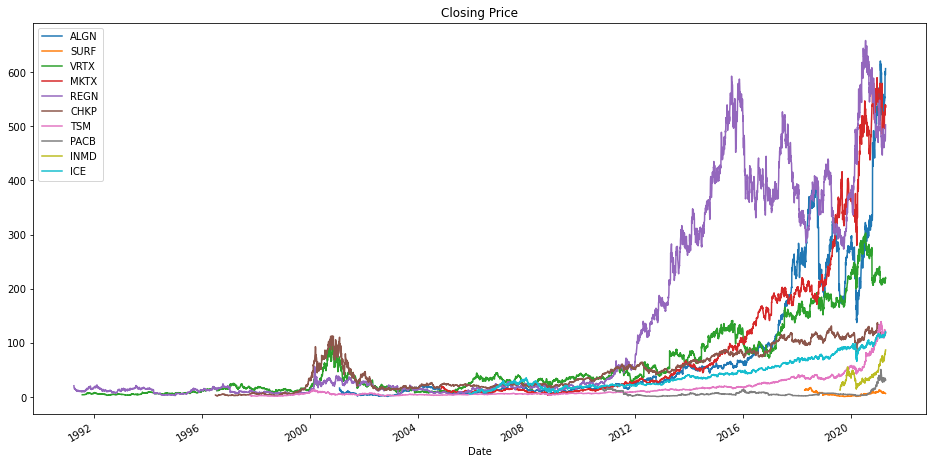

In [15]:
#Question 8.1 - What are the 10 most profitable Instruments 
print('Most Profitable 10 Instruments : ')
df_calc=(df_ark_all_tickers[['Ticker','Sector','Industry','Company','Market Cap','Price','P/E','PEG','P/S','Profit Margin']]).sort_values(by=['Profit Margin'], ascending=False).head(10)
print(df_calc)
ticker_array=df_calc['Ticker']
get_pricing_chart(ticker_array)

Least Profitable 10 Instruments : 
     Ticker                  Sector                        Industry  \
529     ATI             Industrials               Metal Fabrication   
6490   SKLZ  Communication Services  Electronic Gaming & Multimedia   
4151   KODK             Industrials     Specialty Business Services   
2405   EXAS              Healthcare          Diagnostics & Research   
3774   IONS              Healthcare                   Biotechnology   
6956   TEAM              Technology          Software - Application   
858     BLI              Healthcare                   Biotechnology   
6754   SSYS              Technology               Computer Hardware   
2989     GH              Healthcare          Diagnostics & Research   
5094   NSTG              Healthcare                   Biotechnology   

                                  Company  Market Cap  Price  P/E  PEG   P/S  \
529   Allegheny Technologies Incorporated    2,633.18  22.00  nan  nan  0.88   
6490                   

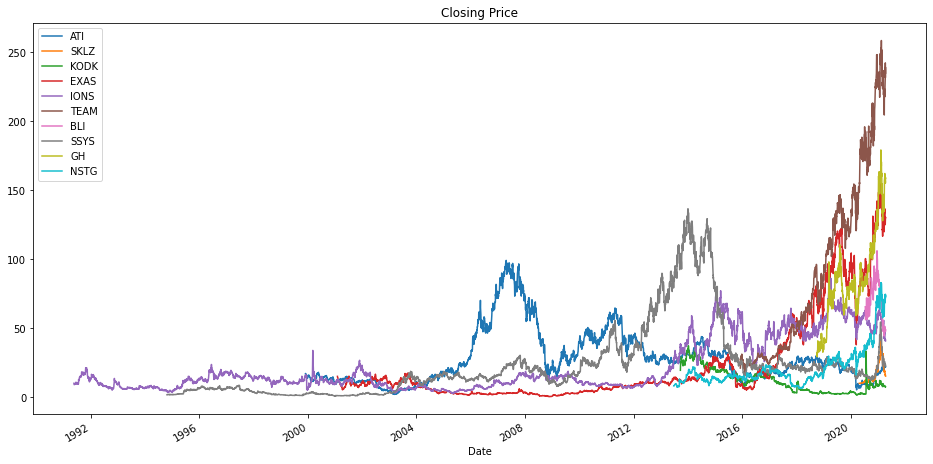

In [16]:
#Question 8.2 - What are the 10 most profitable Instruments 
print('Least Profitable 10 Instruments : ')
df_calc=(df_ark_all_tickers[['Ticker','Sector','Industry','Company','Market Cap','Price','P/E','PEG','P/S','Profit Margin']]).sort_values(by=['Profit Margin'], ascending=False).tail(10)
print(df_calc)
ticker_array=df_calc['Ticker']
get_pricing_chart(ticker_array)

In [17]:
#Question 9 - How does the sector-wise investments looks like in Healthcare

df_ark_all_tickers = df_ark_all_tickers.loc[ (df_ark_all_tickers['Sector'] =='Healthcare')]
    
#print('Top 10 Instruments in Healthcare by Price : ')
(df_ark_all_tickers[['Ticker','Sector','Industry','Company','Market Cap','Price','P/E','PEG','P/S','Profit Margin']]).sort_values(by=['Price'], ascending=False).tail(10)
#print(df_calc)
#ticker_array=df_calc['Ticker']
#get_pricing_chart(ticker_array)

,Ticker,Sector,Industry,Company,Market Cap,Price,P/E,PEG,P/S,Profit Margin
1267,CGEN,Healthcare,Biotechnology,Compugen Ltd.,750.95,8.78,nan,nan,375.48,0.00
3058,GMDA,Healthcare,Biotechnology,Gamida Cell Ltd.,508.32,8.31,nan,nan,nan,0.00
6822,SURF,Healthcare,Biotechnology,"Surface Oncology, Inc.",348.03,8.09,6.68,nan,2.76,47.00
5985,RDHL,Healthcare,Drug Manufacturers - Specialty & Generic,RedHill Biopharma Ltd.,350.47,7.51,nan,nan,5.45,0.00
6879,SYRS,Healthcare,Biotechnology,"Syros Pharmaceuticals, Inc.",467.18,7.39,nan,nan,30.94,0.00
4131,KMDA,Healthcare,Drug Manufacturers - Specialty & Generic,Kamada Ltd.,276.97,6.19,16.29,2.71,2.08,0.00
1234,CERS,Healthcare,Biotechnology,Cerus Corporation,974.75,6.08,nan,nan,8.54,-52.40
2353,EVGN,Healthcare,Biotechnology,Evogene Ltd.,197.09,4.88,nan,nan,244.83,0.00
5780,PSTI,Healthcare,Biotechnology,Pluristem Therapeutics Inc.,166.14,4.81,nan,nan,nan,0.00
1046,BVXV,Healthcare,Biotechnology,BiondVax Pharmaceuticals Ltd.,60.88,3.91,nan,nan,nan,0.00


Bottom 10 Instruments in Healthcare by Price: 
     Ticker      Sector                                  Industry  \
1267   CGEN  Healthcare                             Biotechnology   
3058   GMDA  Healthcare                             Biotechnology   
6822   SURF  Healthcare                             Biotechnology   
5985   RDHL  Healthcare  Drug Manufacturers - Specialty & Generic   
6879   SYRS  Healthcare                             Biotechnology   
4131   KMDA  Healthcare  Drug Manufacturers - Specialty & Generic   
1234   CERS  Healthcare                             Biotechnology   
2353   EVGN  Healthcare                             Biotechnology   
5780   PSTI  Healthcare                             Biotechnology   
1046   BVXV  Healthcare                             Biotechnology   

                            Company  Market Cap  Price   P/E  PEG    P/S  \
1267                  Compugen Ltd.      750.95   8.78   nan  nan 375.48   
3058               Gamida Cell Ltd.      

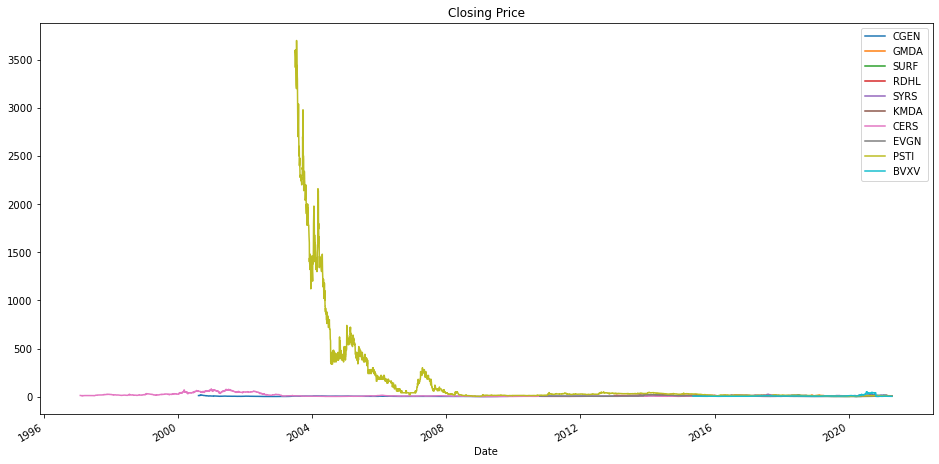

In [18]:
#Question 9.1
print('Bottom 10 Instruments in Healthcare by Price: ')
df_calc=(df_ark_all_tickers[['Ticker','Sector','Industry','Company','Market Cap','Price','P/E','PEG','P/S','Profit Margin']]).sort_values(by=['Price'], ascending=False).tail(10)
print(df_calc)
ticker_array=df_calc['Ticker']
get_pricing_chart(ticker_array)

Most Active 10 Instruments in Healthcare : 
     Ticker      Sector                                  Industry  \
891     BMY  Healthcare              Drug Manufacturers - General   
3778   IOVA  Healthcare                             Biotechnology   
5162   NVTA  Healthcare                    Diagnostics & Research   
22     ABBV  Healthcare              Drug Manufacturers - General   
6978   TEVA  Healthcare  Drug Manufacturers - Specialty & Generic   
759    BFLY  Healthcare                           Medical Devices   
5378   PACB  Healthcare                    Diagnostics & Research   
6943   TDOC  Healthcare               Health Information Services   
1234   CERS  Healthcare                             Biotechnology   
7601   VRTX  Healthcare                             Biotechnology   

                                      Company  Market Cap  Price    P/E  PEG  \
891              Bristol-Myers Squibb Company  138,457.33  62.93    nan  nan   
3778            Iovance Biotherapeut

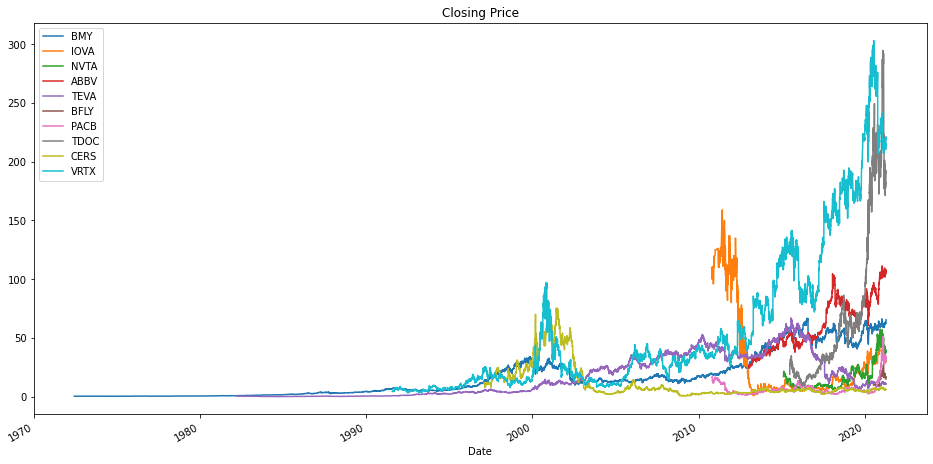

In [19]:
#Question 9.2
print('Most Active 10 Instruments in Healthcare : ')
df_calc=(df_ark_all_tickers[['Ticker','Sector','Industry','Company','Market Cap','Price','P/E','PEG','P/S','Volume']]).sort_values(by=['Volume'], ascending=False).head(10)
print(df_calc)
ticker_array=df_calc['Ticker']
get_pricing_chart(ticker_array)

In [20]:
#Question 9.3
print('Least Active 10 Instruments in Healthcare : ')
(df_ark_all_tickers[['Ticker','Sector','Industry','Company','Market Cap','Price','P/E','PEG','P/S','Volume']]).sort_values(by=['Volume'], ascending=False).tail(10)
#print(df_calc)
#ticker_array=df_calc['Ticker']
#get_pricing_chart(ticker_array)

Least Active 10 Instruments in Healthcare : 


,Ticker,Sector,Industry,Company,Market Cap,Price,P/E,PEG,P/S,Volume
4490,MASS,Healthcare,Medical Devices,908 Devices Inc.,"1,439.80",52.11,nan,nan,48.81,247495
1940,DRIO,Healthcare,Diagnostics & Research,DarioHealth Corp.,311.20,20.38,nan,nan,40.95,131099
6164,RPTX,Healthcare,Biotechnology,Repare Therapeutics Inc.,"1,183.83",30.10,nan,nan,"11,838.33",111865
5985,RDHL,Healthcare,Drug Manufacturers - Specialty & Generic,RedHill Biopharma Ltd.,350.47,7.51,nan,nan,5.45,110420
4131,KMDA,Healthcare,Drug Manufacturers - Specialty & Generic,Kamada Ltd.,276.97,6.19,16.29,2.71,2.08,83387
2207,ENLV,Healthcare,Biotechnology,Enlivex Therapeutics Ltd.,175.22,11.29,nan,nan,nan,75426
1046,BVXV,Healthcare,Biotechnology,BiondVax Pharmaceuticals Ltd.,60.88,3.91,nan,nan,nan,66286
6901,TARO,Healthcare,Drug Manufacturers - Specialty & Generic,Taro Pharmaceutical Industries Ltd.,"2,847.10",74.59,nan,nan,4.95,35146
5847,PYPD,Healthcare,Biotechnology,PolyPid Ltd.,185.57,9.66,nan,nan,nan,25053
3855,ITMR,Healthcare,Medical Devices,Itamar Medical Ltd.,381.51,23.29,nan,nan,9.30,9432


Most Profitable 10 Instruments in Healthcare: 
     Ticker      Sector                        Industry  \
262    ALGN  Healthcare                 Medical Devices   
6822   SURF  Healthcare                   Biotechnology   
7601   VRTX  Healthcare                   Biotechnology   
6007   REGN  Healthcare                   Biotechnology   
5378   PACB  Healthcare          Diagnostics & Research   
3746   INMD  Healthcare                 Medical Devices   
3837   ISRG  Healthcare  Medical Instruments & Supplies   
7446   VEEV  Healthcare     Health Information Services   
7066    TMO  Healthcare          Diagnostics & Research   
5158    NVS  Healthcare    Drug Manufacturers - General   

                                      Company  Market Cap  Price    P/E  PEG  \
262                    Align Technology, Inc.   42,274.08 545.05  24.28 0.85   
6822                   Surface Oncology, Inc.      348.03   8.09   6.68  nan   
7601      Vertex Pharmaceuticals Incorporated   54,793.89 213.0

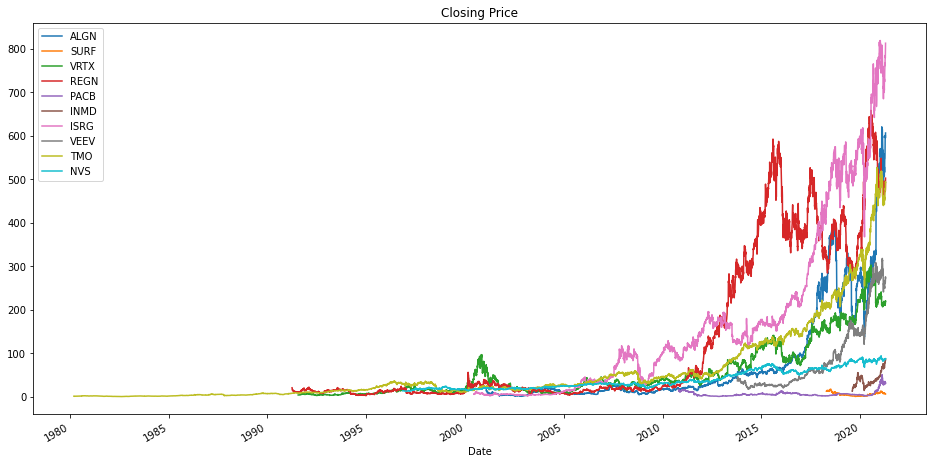

In [21]:
#Question 9.4
print('Most Profitable 10 Instruments in Healthcare: ')
df_calc=(df_ark_all_tickers[['Ticker','Sector','Industry','Company','Market Cap','Price','P/E','PEG','P/S','Profit Margin']]).sort_values(by=['Profit Margin'], ascending=False).head(10)
print(df_calc)
ticker_array=df_calc['Ticker']
get_pricing_chart(ticker_array)

Least Profitable 10 Instruments in Healthcare: 
     Ticker      Sector                                  Industry  \
1208   CDXS  Healthcare                             Biotechnology   
6943   TDOC  Healthcare               Health Information Services   
1234   CERS  Healthcare                             Biotechnology   
5772   PSNL  Healthcare                             Biotechnology   
6901   TARO  Healthcare  Drug Manufacturers - Specialty & Generic   
2405   EXAS  Healthcare                    Diagnostics & Research   
3774   IONS  Healthcare                             Biotechnology   
858     BLI  Healthcare                             Biotechnology   
2989     GH  Healthcare                    Diagnostics & Research   
5094   NSTG  Healthcare                             Biotechnology   

                                  Company  Market Cap  Price  P/E  PEG   P/S  \
1208                        Codexis, Inc.    1,587.52  24.30  nan  nan 22.97   
6943                 Teladoc Hea

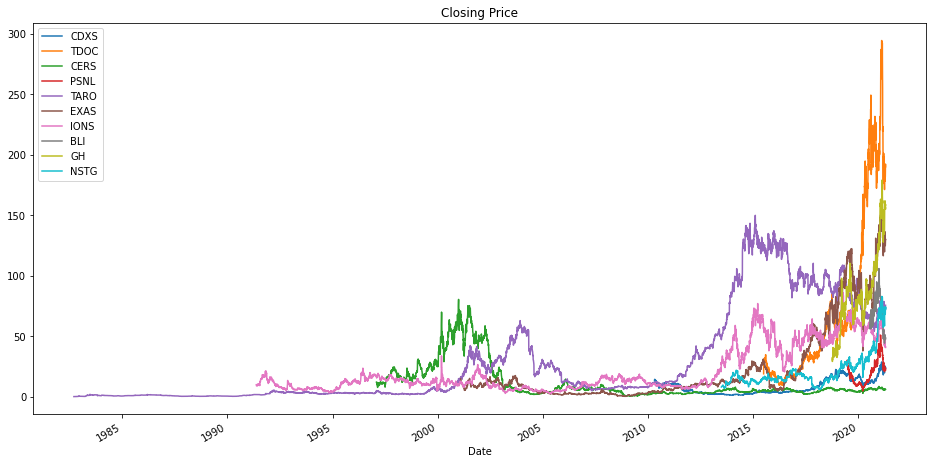

In [22]:
#Question 9.5
print('Least Profitable 10 Instruments in Healthcare: ')
df_calc=(df_ark_all_tickers[['Ticker','Sector','Industry','Company','Market Cap','Price','P/E','PEG','P/S','Profit Margin']]).sort_values(by=['Profit Margin'], ascending=False).tail(10)
print(df_calc)
ticker_array=df_calc['Ticker']
get_pricing_chart(ticker_array)


In [23]:
df_ark_all_tickers.corr(method ='pearson')

,No.,Market Cap,P/E,Forward P/E,PEG,P/S,P/B,P/Cash,P/Free Cash Flow,EPS (ttm),Shares Outstanding,Shares Float,Short Ratio,Current Ratio,Quick Ratio,LT Debt/Equity,Total Debt/Equity,Profit Margin,Beta,Average True Range,20-Day Simple Moving Average,50-Day Simple Moving Average,Relative Strength Index (14),Analyst Recom,Average Volume,Relative Volume,Price,Volume,Target Price,After-Hours Close
No.,1.00,0.02,0.06,0.06,-0.03,-0.19,-0.10,0.11,-0.07,0.06,-0.09,-0.10,-0.09,0.10,0.10,-0.12,-0.12,0.11,-0.23,0.08,0.03,0.09,0.00,0.27,-0.10,-0.05,0.11,-0.16,0.16,0.12
Market Cap,0.02,1.00,-0.26,-0.34,0.39,-0.06,-0.01,0.11,-0.19,0.41,0.81,0.81,-0.19,-0.29,-0.29,0.54,0.53,0.24,-0.44,0.20,0.05,0.32,0.25,0.02,0.42,-0.09,0.46,0.37,0.41,0.46
P/E,0.06,-0.26,1.00,0.53,0.73,0.97,0.58,0.08,0.98,-0.29,-0.12,-0.12,-0.11,0.44,0.44,-0.13,-0.13,0.08,0.29,-0.11,0.44,-0.05,0.09,0.47,0.43,-0.13,-0.22,0.40,-0.36,-0.22
Forward P/E,0.06,-0.34,0.53,1.00,0.20,0.48,0.50,0.89,0.78,-0.12,-0.29,-0.34,-0.13,0.06,0.10,-0.39,-0.39,-0.04,0.03,0.02,0.54,-0.35,0.03,-0.03,-0.29,-0.33,-0.12,-0.31,-0.12,-0.12
PEG,-0.03,0.39,0.73,0.20,1.00,0.31,0.44,-0.04,0.05,-0.39,0.17,0.18,-0.34,0.10,0.09,0.41,0.42,-0.52,-0.00,0.11,0.27,0.02,0.38,0.42,0.37,-0.25,0.23,0.29,0.09,0.23
P/S,-0.19,-0.06,0.97,0.48,0.31,1.00,0.24,0.00,-0.01,-0.10,-0.06,-0.05,0.13,-0.04,-0.04,-0.06,-0.06,0.04,0.23,0.11,-0.17,-0.11,-0.12,0.04,-0.04,-0.06,-0.03,-0.06,-0.04,-0.03
P/B,-0.10,-0.01,0.58,0.50,0.44,0.24,1.00,0.50,0.03,0.00,-0.09,-0.09,0.13,-0.03,-0.03,0.04,0.01,0.08,0.01,0.33,0.28,0.22,0.29,-0.14,-0.09,0.07,0.16,-0.05,0.07,0.15
P/Cash,0.11,0.11,0.08,0.89,-0.04,0.00,0.50,1.00,-0.11,0.17,0.06,0.02,-0.18,-0.21,-0.21,0.09,0.08,0.15,-0.34,0.24,0.27,0.17,0.26,-0.02,-0.02,-0.09,0.17,-0.04,0.09,0.17
P/Free Cash Flow,-0.07,-0.19,0.98,0.78,0.05,-0.01,0.03,-0.11,1.00,-0.18,-0.13,-0.13,0.55,-0.02,-0.01,-0.04,0.00,-0.44,0.10,-0.13,-0.49,-0.49,-0.53,0.28,-0.12,0.16,-0.17,-0.10,-0.19,-0.17
EPS (ttm),0.06,0.41,-0.29,-0.12,-0.39,-0.10,0.00,0.17,-0.18,1.00,0.06,0.06,-0.17,-0.16,-0.16,0.01,-0.00,0.54,-0.30,0.50,0.07,0.22,0.19,-0.01,-0.09,-0.02,0.72,-0.10,0.78,0.72


In [24]:
df_ark_all_tickers.corr(method ='kendall')

,No.,Market Cap,P/E,Forward P/E,PEG,P/S,P/B,P/Cash,P/Free Cash Flow,EPS (ttm),Shares Outstanding,Shares Float,Short Ratio,Current Ratio,Quick Ratio,LT Debt/Equity,Total Debt/Equity,Profit Margin,Beta,Average True Range,20-Day Simple Moving Average,50-Day Simple Moving Average,Relative Strength Index (14),Analyst Recom,Average Volume,Relative Volume,Price,Volume,Target Price,After-Hours Close
No.,1.00,0.12,-0.03,-0.02,-0.02,-0.11,-0.15,-0.02,-0.17,0.02,0.07,0.08,-0.05,0.04,0.02,0.06,0.06,0.09,-0.21,0.10,0.03,0.06,0.01,0.18,-0.03,-0.01,0.11,-0.02,0.15,0.12
Market Cap,0.12,1.00,0.08,-0.31,0.24,-0.11,0.18,0.41,-0.30,0.07,0.63,0.64,0.04,-0.28,-0.29,0.28,0.23,0.07,-0.43,0.48,0.19,0.33,0.28,0.17,0.34,0.04,0.65,0.33,0.51,0.65
P/E,-0.03,0.08,1.00,0.31,0.60,0.56,0.59,0.33,0.56,-0.23,0.21,0.18,-0.13,0.09,0.08,-0.16,-0.12,-0.13,0.47,0.15,0.72,0.15,0.41,0.40,0.05,-0.12,0.10,0.05,-0.27,0.10
Forward P/E,-0.02,-0.31,0.31,1.00,0.05,0.52,0.37,0.37,0.65,0.05,-0.35,-0.41,0.02,0.30,0.30,-0.56,-0.50,0.14,0.14,0.31,0.35,-0.28,0.03,0.01,-0.49,0.04,0.03,-0.56,0.12,0.03
PEG,-0.02,0.24,0.60,0.05,1.00,0.02,0.24,0.07,0.06,-0.16,0.20,0.20,-0.16,0.11,0.09,0.21,0.18,-0.35,0.22,0.02,0.38,0.05,0.20,0.19,0.05,-0.16,0.09,0.13,0.02,0.09
P/S,-0.11,-0.11,0.56,0.52,0.02,1.00,0.27,0.10,0.56,-0.16,-0.16,-0.17,0.04,0.50,0.51,-0.45,-0.44,0.01,0.38,0.28,0.07,-0.25,-0.09,0.02,-0.05,0.14,-0.01,-0.01,-0.02,-0.02
P/B,-0.15,0.18,0.59,0.37,0.24,0.27,1.00,0.42,0.26,0.11,0.10,0.09,0.10,0.08,0.09,-0.09,-0.13,0.02,0.03,0.35,0.24,0.14,0.21,-0.11,-0.01,0.09,0.25,0.04,0.10,0.23
P/Cash,-0.02,0.41,0.33,0.37,0.07,0.10,0.42,1.00,0.10,0.25,0.28,0.25,-0.07,-0.21,-0.21,-0.03,-0.03,0.12,-0.33,0.40,0.33,0.21,0.33,0.04,0.09,0.01,0.38,0.07,0.21,0.37
P/Free Cash Flow,-0.17,-0.30,0.56,0.65,0.06,0.56,0.26,0.10,1.00,-0.19,-0.29,-0.29,0.39,0.26,0.26,-0.27,-0.26,-0.35,0.35,0.24,0.27,-0.42,-0.14,-0.08,-0.34,0.12,-0.08,-0.35,-0.18,-0.09
EPS (ttm),0.02,0.07,-0.23,0.05,-0.16,-0.16,0.11,0.25,-0.19,1.00,0.10,0.08,-0.11,-0.07,-0.07,-0.03,-0.07,0.31,-0.22,0.06,0.20,0.17,0.21,-0.10,-0.03,0.05,0.10,-0.02,0.15,0.09


In [ ]:
df_ark_all_tickers

In [53]:
df_cryptos = pd.read_json('/Users/senthil/Documents/alpha-research/sources/fmprep/all-cryptos.json').sort_values('marketCap',ascending=False).head(15)

In [55]:
#df_cryptos.corr(method ='pearson')
df_cryptos.corr(method ='kendall')

,price,changesPercentage,change,dayLow,dayHigh,yearHigh,yearLow,marketCap,priceAvg50,priceAvg200,volume,avgVolume,open,previousClose,eps,pe,earningsAnnouncement,sharesOutstanding
price,1.00,-0.18,0.22,0.98,1.00,1.00,0.87,0.30,0.98,0.92,0.05,0.16,0.98,0.98,nan,nan,nan,-0.75
changesPercentage,-0.18,1.00,0.45,-0.20,-0.18,-0.18,-0.09,0.03,-0.20,-0.14,-0.18,-0.07,-0.20,-0.20,nan,nan,nan,0.09
change,0.22,0.45,1.00,0.20,0.22,0.22,0.24,0.20,0.20,0.22,-0.09,0.03,0.20,0.20,nan,nan,nan,-0.20
dayLow,0.98,-0.20,0.20,1.00,0.98,0.98,0.89,0.28,1.00,0.94,0.07,0.18,1.00,1.00,nan,nan,nan,-0.77
dayHigh,1.00,-0.18,0.22,0.98,1.00,1.00,0.87,0.30,0.98,0.92,0.05,0.16,0.98,0.98,nan,nan,nan,-0.75
yearHigh,1.00,-0.18,0.22,0.98,1.00,1.00,0.87,0.30,0.98,0.92,0.05,0.16,0.98,0.98,nan,nan,nan,-0.75
yearLow,0.87,-0.09,0.24,0.89,0.87,0.87,1.00,0.24,0.89,0.94,0.07,0.18,0.89,0.89,nan,nan,nan,-0.81
marketCap,0.30,0.03,0.20,0.28,0.30,0.30,0.24,1.00,0.28,0.26,0.52,0.64,0.28,0.28,nan,nan,nan,-0.05
priceAvg50,0.98,-0.20,0.20,1.00,0.98,0.98,0.89,0.28,1.00,0.94,0.07,0.18,1.00,1.00,nan,nan,nan,-0.77
priceAvg200,0.92,-0.14,0.22,0.94,0.92,0.92,0.94,0.26,0.94,1.00,0.09,0.20,0.94,0.94,nan,nan,nan,-0.79
